In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ML_PROJECT/DWI_with_Labels.xlsx")

1)  Evaluate the intraclass spread and interclass distances between the classes in your dataset. If your data deals with multiple classes, you can take any two classes.

In [ ]:
class_column = "Label"

class_1, class_2 = df[class_column].unique()[:2]

df_class_1 = df[df[class_column] == class_1].drop(columns=[class_column])
df_class_2 = df[df[class_column] == class_2].drop(columns=[class_column])

centroid_1 = df_class_1.mean(axis=0).values
centroid_2 = df_class_2.mean(axis=0).values

spread_1 = df_class_1.std(axis=0).values
spread_2 = df_class_2.std(axis=0).values

interclass_distance = np.linalg.norm(centroid_1 - centroid_2)

print(f"Class 1 ({class_1}) Centroid:\n", centroid_1)
print(f"Class 2 ({class_2}) Centroid:\n", centroid_2)
print(f"Class 1 ({class_1}) Spread:\n", spread_1)
print(f"Class 2 ({class_2}) Spread:\n", spread_2)
print(f"Interclass Distance: {interclass_distance}")

Class 1 (0) Centroid:
 [0.00000000e+00 1.85889087e-04 4.63558214e-02 ... 1.82663417e+00
 7.24526712e-01 0.00000000e+00]
Class 2 (1) Centroid:
 [0.00000000e+00 2.40055960e-04 3.83625459e-02 ... 1.50626506e+00
 5.91363946e-01 0.00000000e+00]
Class 1 (0) Spread:
 [0.00000000e+00 3.94678063e-04 4.65212677e-02 ... 5.62976076e-01
 3.03046967e-01 0.00000000e+00]
Class 2 (1) Spread:
 [0.         0.00143245 0.04724059 ... 0.50841621 0.24695827 0.        ]
Interclass Distance: 7.2095850375351835


2)  Take any feature from your dataset. Observe the density pattern for that feature by plotting the histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and variance from the available data.

Feature: 1
Mean: 0.00020990647405288724
Variance: 9.946335225285194e-07


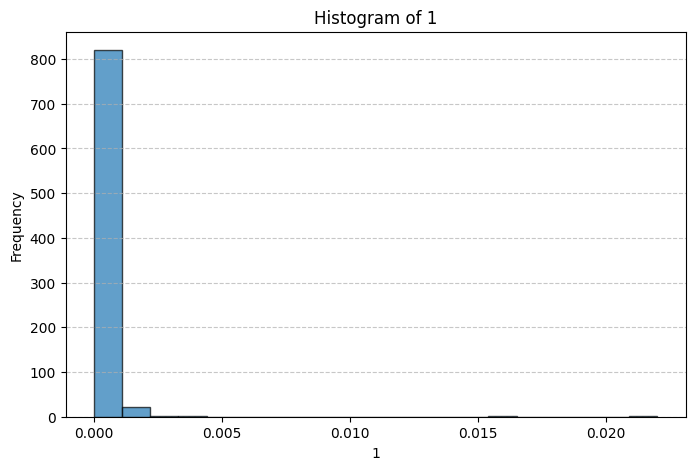

In [ ]:
feature_column = df.columns[1]

df_feature = df[feature_column].dropna()

mean_value = np.mean(df_feature)
variance_value = np.var(df_feature)

plt.figure(figsize=(8,5))
plt.hist(df_feature, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel(feature_column)
plt.ylabel("Frequency")
plt.title(f"Histogram of {feature_column}")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display statistics
print(f"Feature: {feature_column}")
print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")

plt.show()

3) Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 to 10.

Minkowski Distances for r = 1 to 10: [460.2387180506365, 18.193408622103767, 7.698166637911951, 5.3604530714594345, 4.436916581297029, 3.9641373015952084, 3.683584017011123, 3.5004709419543225, 3.372768483227974, 3.279266909237491]


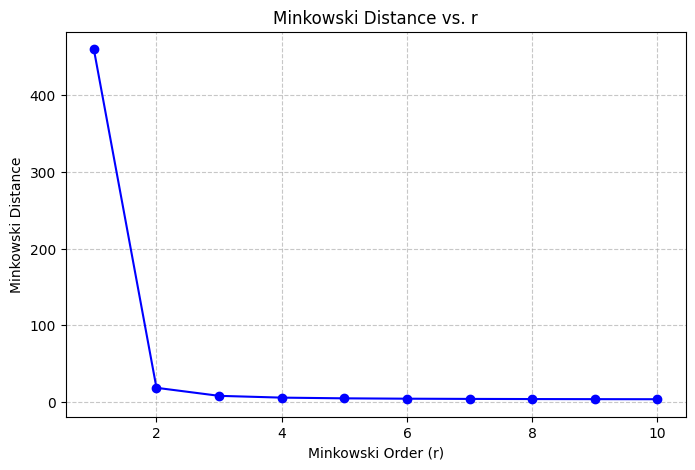

In [ ]:
feature_vector_1 = df.iloc[0, :-1].values
feature_vector_2 = df.iloc[1, :-1].values

r_values = range(1, 11)
distances = [np.linalg.norm(feature_vector_1 - feature_vector_2, ord=r) for r in r_values]

plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', linestyle='-', color='b')
plt.xlabel("Minkowski Order (r)")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs. r")
plt.grid(True, linestyle="--", alpha=0.7)

print("Minkowski Distances for r = 1 to 10:", distances)

plt.show()

4)  Divide dataset in your project into two parts – train & test set. To accomplish this, use the train test_split() function available in SciKit.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")

Training set size: (678, 6724), (678,)
Testing set size: (170, 6724), (170,)


5) Train a kNN classifier (k =3) using the training set obtained from above exercise.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

6) Test the accuracy of the kNN using the test set obtained from above exercise. Following code for help.

In [ ]:
print(knn.score(X_test_scaled,y_test))

0.711764705882353


7) Use the predict() function to study the prediction behavior of the classifier for test vectors.

In [ ]:
y_pred = knn.predict(X_test_scaled)

 8) Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 11 and make an accuracy plot.

k=1, Accuracy=0.7059
k=2, Accuracy=0.7294
k=3, Accuracy=0.7118
k=4, Accuracy=0.7294
k=5, Accuracy=0.7000
k=6, Accuracy=0.7412
k=7, Accuracy=0.7412
k=8, Accuracy=0.7529
k=9, Accuracy=0.7118
k=10, Accuracy=0.7353
k=11, Accuracy=0.7294


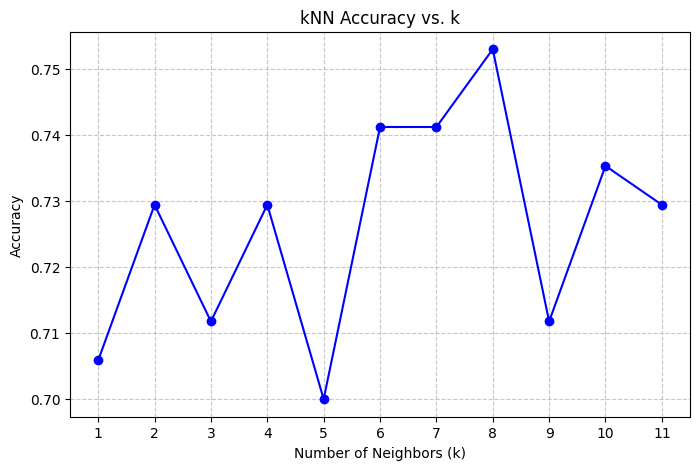

In [ ]:
k_values = range(1, 12)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Accuracy vs. k")
plt.xticks(k_values)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

9) Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

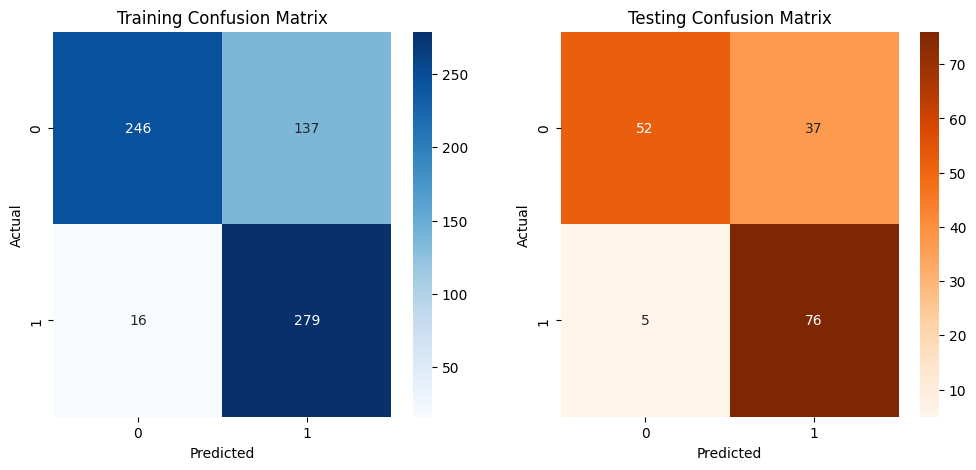

Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.64      0.76       383
           1       0.67      0.95      0.78       295

    accuracy                           0.77       678
   macro avg       0.80      0.79      0.77       678
weighted avg       0.82      0.77      0.77       678

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.58      0.71        89
           1       0.67      0.94      0.78        81

    accuracy                           0.75       170
   macro avg       0.79      0.76      0.75       170
weighted avg       0.80      0.75      0.75       170

Training Accuracy: 0.7743
Testing Accuracy: 0.7529
Model is well-generalized (Regular Fit)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

k = 8
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Training Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Testing Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if train_accuracy > 0.95 and test_accuracy < 0.8:
    print("Model is likely Overfitting")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("Model is likely Underfitting")
else:
    print("Model is well-generalized (Regular Fit)")